In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,556.0,
       840.0,685.0,700.0,700.0,690.0,900.0,650.0,820.0,850.0,900.0,1015.0,820.0,1100.0,
       1000.0,1100.0,1000.0,1000.0])

In [3]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(perch_length,perch_weight,random_state=42)

In [4]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)


In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [6]:
lr.predict([[15]]) # 무게가 음수로 나온다

array([-123.7614705])

In [7]:
lr.predict([[50]])

array([1241.83860323])

In [8]:
lr.coef_,lr.intercept_

(array([39.01714496]), -709.0186449535474)

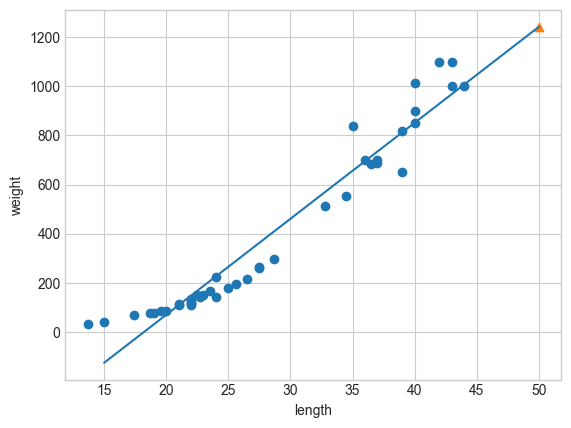

In [9]:
plt.scatter(x_train,y_train)
plt.plot([15,50],[15*lr.coef_+lr.intercept_ , 50*lr.coef_+lr.intercept_])

plt.scatter(50,1241,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
print(lr.score(x_train,y_train)) # 과소적합
print(lr.score(x_test,y_test))

0.9398463339976041
0.824750312331356


다항 회귀 (Polynomial Regression)

In [11]:
train_poly = np.column_stack((x_train ** 2,x_train))
test_poly = np.column_stack((x_test ** 2, x_test))

In [12]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [13]:
lr = LinearRegression()
lr.fit(train_poly,y_train)
lr.predict([[50**2,50]])

array([1573.98423528])

In [14]:
lr.coef_,lr.intercept_

(array([  1.01433211, -21.55792498]), 116.0502107827827)

In [15]:
lr.coef_[0]

1.0143321093767301

In [16]:
lr.predict([[50**2,50]])

array([1573.98423528])

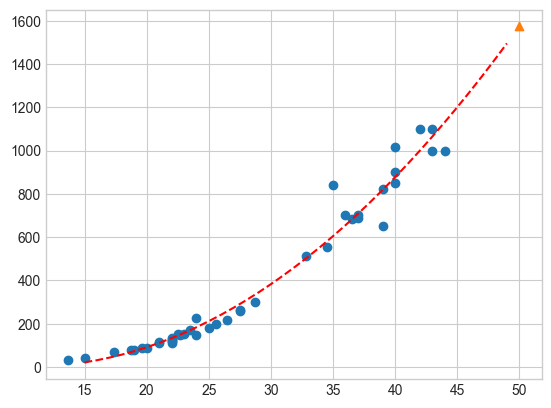

In [17]:
point = np.arange(15,50)
plt.scatter(x_train,y_train)
plt.plot(point,lr.coef_[0]*point**2+lr.coef_[1]*point+lr.intercept_,'r--')
plt.scatter(50,1574,marker='^')

In [18]:
print(lr.score(train_poly,y_train))
print(lr.score(test_poly,y_test))

0.9706807451768623
0.9775935108325122


### 다중 회귀 (multiple Regression)

In [19]:
df = pd.read_csv('https://bit.ly/perch_csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [20]:
perch_full = df.to_numpy()
perch_full  # 특성이 3개

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [21]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [22]:
x_train,x_test,y_train,y_test =train_test_split(perch_full,perch_weight,
                                                random_state=42)


In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
poly.transform([[2,3]]) # 1(bias), 2 , 3 , 2**2 , 2*3 , 3**2


array([[1., 2., 3., 4., 6., 9.]])

In [24]:
poly = PolynomialFeatures(include_bias=False)
train_poly = poly.fit_transform(x_train)
train_poly.shape

(42, 9)

In [25]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [26]:
test_poly = poly.transform(x_test)

In [27]:
lr = LinearRegression()
lr.fit(train_poly,y_train)

LinearRegression()

In [28]:
print(lr.score(train_poly,y_train))
print(lr.score(test_poly,y_test))

0.9903183436982124
0.9714559911594124


In [29]:
poly = PolynomialFeatures(degree=5,include_bias=False)
train_poly = poly.fit_transform(x_train)
test_poly= poly.transform(x_test)
train_poly.shape


(42, 55)

In [30]:
lr.fit(train_poly,y_train)
print(lr.score(train_poly,y_train)) # 훈련 세트에 대해서는 너무 과대적합
print(lr.score(test_poly,y_test)) # 규제를 줘서 모델이 훈련 세트에 대해 과대적합 되지 않도록 한다.

0.9999999999997242
-144.40564485442695


In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [32]:
train_scaled =ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge() # 기본값 alpha = 1
ridge.fit(train_scaled,y_train)

Ridge()

In [34]:
print(ridge.score(train_scaled,y_train))
print(ridge.score(test_scaled,y_test))

0.9896101671037343
0.9790693977615391


In [35]:
train_list = []
test_list = []
alpha =[0.001,0.01,0.1,1,10,100]
for i in alpha :
    ridge = Ridge(alpha=i)
    ridge.fit(train_scaled,y_train)
    train_list.append(ridge.score(train_scaled,y_train))
    test_list.append(ridge.score(test_scaled,y_test))

In [37]:
train_list,test_list

([0.9930455252088444,
  0.9917809981250477,
  0.9903815817570363,
  0.9896101671037343,
  0.988728468997471,
  0.9841843235774494],
 [0.9569388961545304,
  0.980018793687114,
  0.9827976465386975,
  0.9790693977615391,
  0.9725329582461568,
  0.9627042641050291])

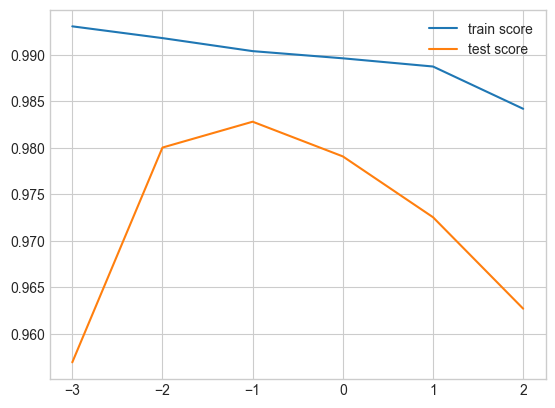

In [44]:
plt.plot(np.log10(alpha),train_list,label ='train score')
plt.plot(np.log10(alpha),test_list,label ='test score')
plt.legend()

In [46]:
ridge =Ridge(alpha=0.1)
ridge.fit(train_scaled,y_train)
print(ridge.score(train_scaled,y_train))
print(ridge.score(test_scaled,y_test))

0.9903815817570363
0.9827976465386975


In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,y_train)

Lasso()

In [48]:
print(lasso.score(train_scaled,y_train))
print(lasso.score(test_scaled,y_test))

0.989789897208096
0.9800593698421883


In [49]:
train_list = []
test_list = []

In [50]:
for i in alpha :
    lasso = Lasso(alpha=i)
    lasso.fit(train_scaled,y_train)

    train_list.append(lasso.score(train_scaled,y_train))
    test_list.append(lasso.score(test_scaled,y_test))

C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

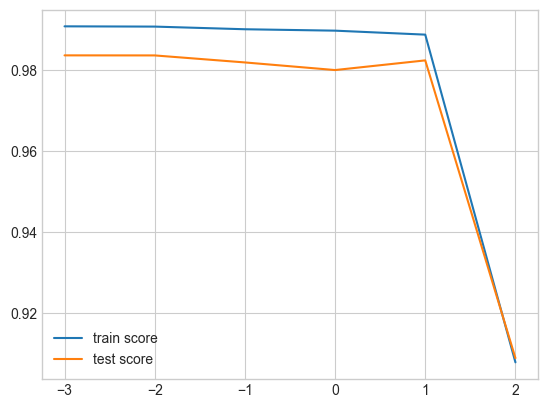

In [51]:
plt.plot(np.log10(alpha),train_list,label='train score')
plt.plot(np.log10(alpha),test_list,label='test score')
plt.legend()

In [55]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled,y_train)

Lasso(alpha=10)

In [56]:
np.sum(lasso.coef_==0) # 55개중 40개는 0으로 15개의 특성만 사용한다. 

40